In [248]:
import joblib
import pandas as pd

Trained_SVM = joblib.load('HOS_SVM.pkl')
Trained_NB = joblib.load('HOS_NB.pk1')
Trained_LR = joblib.load('HOS_LR.pk1')
vectorizer1 = joblib.load('vectorizer1.pkl')

df = pd.read_csv(r'C:\Users\vishw\Downloads\archive (1)\spam_ham_dataset.csv')
df


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [249]:
df.drop(columns = ['Unnamed: 0', 'label'], inplace = True)
df

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [250]:
df.isnull().sum()


text         0
label_num    0
dtype: int64

In [251]:
df.duplicated().sum()

178

In [252]:
df = df.drop_duplicates(keep = 'first')

In [253]:
values = df['label_num'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100 #ham
percentage_1 = (values[1]/ total) *100 #spam

print('percentage of ham :' ,percentage_0)
print('percentage of spam :' ,percentage_1)

percentage of ham : 70.71900660925296
percentage of spam : 29.280993390747046


In [254]:
#getting just the subject
subject = df['text'].str.replace("Subject:", '')
#adding a new row
df["Subject"] = subject
new_df = df
df.head()

C:\Users\vishw\AppData\Local\Temp\ipykernel_1564\731712420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Subject"] = subject


,text,label_num,Subject
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol ; meter # : 988291\r\nthis is ...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"hpl nom for january 9 , 2001\r\n( see attache..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"neon retreat\r\nho ho ho , we ' re around to ..."
3,"Subject: photoshop , windows , office . cheap ...",1,"photoshop , windows , office . cheap . main t..."
4,Subject: re : indian springs\r\nthis deal is t...,0,re : indian springs\r\nthis deal is to book t...


## Test on Kaggle Dataset

In [150]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['Subject'].astype(str)
X_tfidf = vectorizer1.transform(X)

In [151]:
import sklearn
# from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score


y_pred = Trained_SVM.predict(X_tfidf)
y_test = df['label_num'].values

SVM_accuracy = accuracy_score(y_test, y_pred)
SVM_precision = precision_score(y_test, y_pred)
print("Accuracy:", SVM_accuracy)
print("Precision:", SVM_precision)

Accuracy: 0.7674744642499499
Precision: 0.6431969552806851


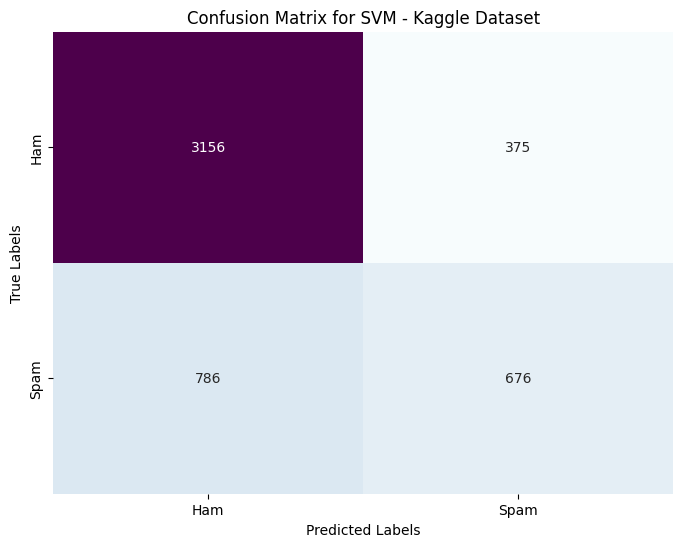

In [152]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM - Kaggle Dataset')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [153]:
y_pred = Trained_NB.predict(X_tfidf)
y_test = df['label_num'].values

NB_accuracy = accuracy_score(y_test, y_pred)
NB_precision = precision_score(y_test, y_pred)
print("Accuracy:", NB_accuracy)
print("Precision:", NB_precision)

Accuracy: 0.6871620268375725
Precision: 0.4767873723305478


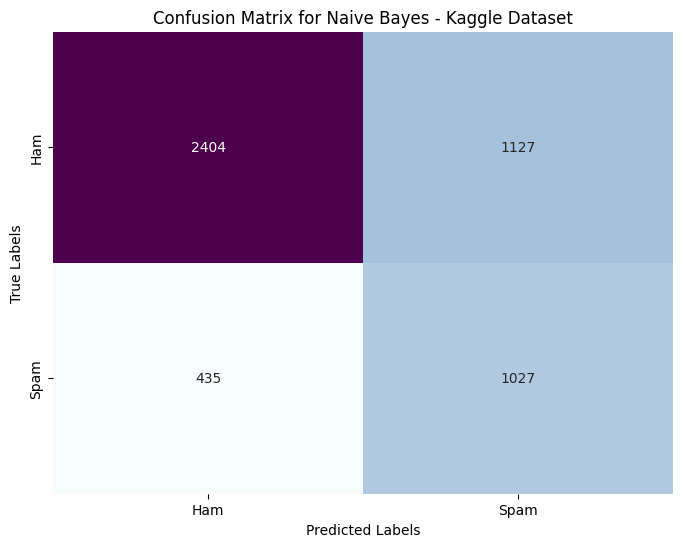

In [154]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes - Kaggle Dataset')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [155]:
y_pred = Trained_LR.predict(X_tfidf)
y_test = df['label_num'].values

LR_accuracy = accuracy_score(y_test, y_pred)
LR_precision = precision_score(y_test, y_pred)
print("Accuracy:", LR_accuracy)
print("Precision:", LR_precision)

Accuracy: 0.7616663328660124
Precision: 0.610032362459547


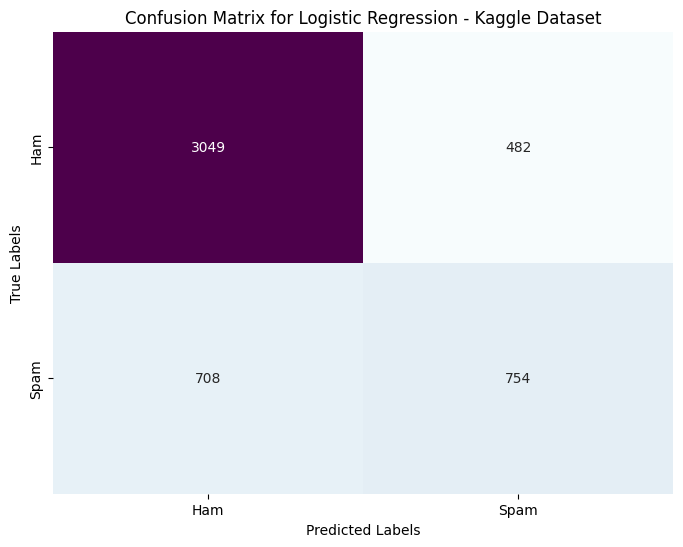

In [156]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression - Kaggle Dataset')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [157]:
model_table = [
    {'Model': 'Logistic Regression', 'Accuracy': LR_accuracy, 'Precision': LR_precision},
    {'Model': 'Naive Bayes', 'Accuracy': NB_accuracy, 'Precision': NB_precision},
    {'Model': 'SVM', 'Accuracy': SVM_accuracy, 'Precision': SVM_precision},
]

# Convert the data to a DataFrame
df = pd.DataFrame(model_table)


# Sort the DataFrame by both Accuracy and Precision scores
sorted_df = df.sort_values(by=['Accuracy', 'Precision'], ascending=[False, False])
sorted_df.reset_index(drop=True, inplace=True)

sorted_df.index = range(1, len(df) + 1)
sorted_df

,Model,Accuracy,Precision
1,SVM,0.767474,0.643197
2,Logistic Regression,0.761666,0.610032
3,Naive Bayes,0.687162,0.476787


## Test on Apache Corpus SPAM/HAM Dataset (SpamAssassin)

In [158]:
test2_df = pd.read_csv(r'C:\Users\vishw\OneDrive\Desktop\Combined_test_texts.csv')
test2_df

,Main_Content,Label
0,THE MOTLEY FOOL PERSONAL FINANCE Wednesday Jan...,0
1,May 7 2002Dear Congratulations On behalf of Fr...,0
2,The following domains that are registered as b...,0
3,BEGIN PGP SIGNED MESSAGEHash SHA1 CAUCE NEWS V...,0
4,THE ISO17799 NEWSLETTER EDITION 4Welcome to th...,0
...,...,...
1641,Want To Be Your Own Boss Train Now With SelfPa...,1
1642,Preferred NonSmoker Just what the doctor order...,1
1643,Dear SubscriberIf I could show you a way to ge...,1
1644,MidSummer Customer Appreciation SALETo express...,1


In [159]:
values = test2_df['Label'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100 #ham
percentage_1 = (values[1]/ total) *100 #spam

print('percentage of ham :' ,percentage_0)
print('percentage of spam :' ,percentage_1)

percentage of ham : 15.188335358444716
percentage of spam : 84.81166464155528


In [160]:
X = test2_df['Main_Content'].astype(str)
X_tfidf = vectorizer1.transform(X)

In [161]:
y_pred = Trained_SVM.predict(X_tfidf)
y_test = test2_df['Label'].values

SVM_accuracy = accuracy_score(y_test, y_pred)
SVM_precision = precision_score(y_test, y_pred)
print("Accuracy:", SVM_accuracy)
print("Precision:", SVM_precision)

Accuracy: 0.9301336573511543
Precision: 0.9426399447131997


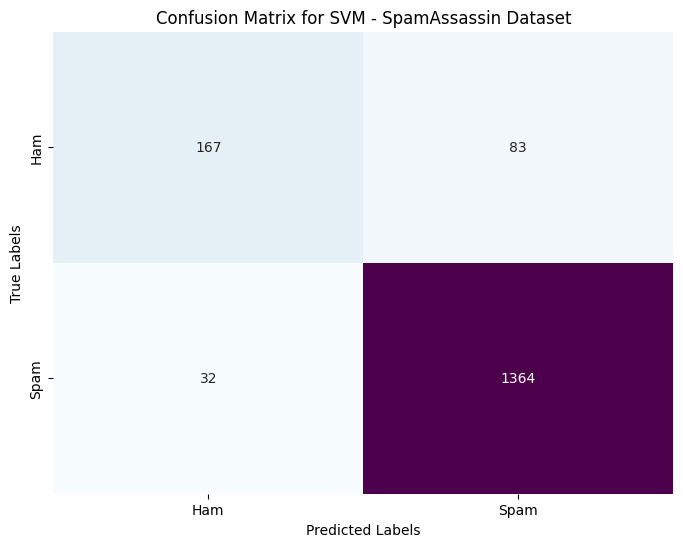

In [162]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM - SpamAssassin Dataset')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [163]:
y_pred = Trained_NB.predict(X_tfidf)
y_test = test2_df['Label'].values

NB_accuracy = accuracy_score(y_test, y_pred)
NB_precision = precision_score(y_test, y_pred)
print("Accuracy:", NB_accuracy)
print("Precision:", NB_precision)

Accuracy: 0.9070473876063183
Precision: 0.9331010452961672


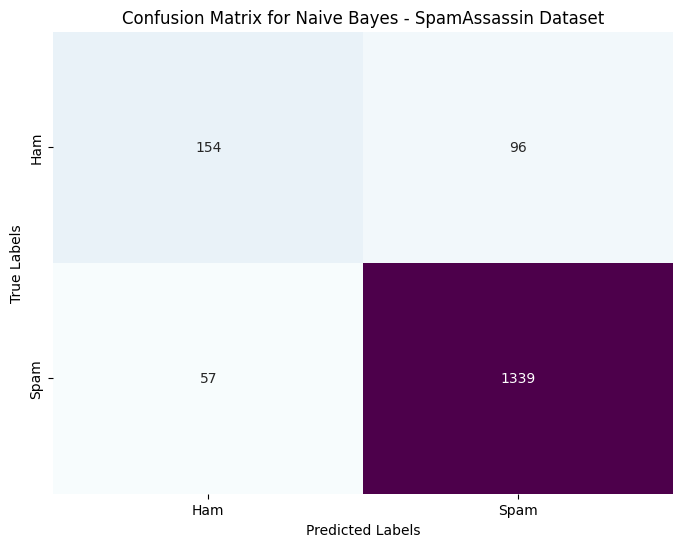

In [164]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes - SpamAssassin Dataset')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [165]:
y_pred = Trained_LR.predict(X_tfidf)
y_test = test2_df['Label'].values

LR_accuracy = accuracy_score(y_test, y_pred)
LR_precision = precision_score(y_test, y_pred)
print("Accuracy:", LR_accuracy)
print("Precision:", LR_precision)

Accuracy: 0.9015795868772782
Precision: 0.9375886524822695


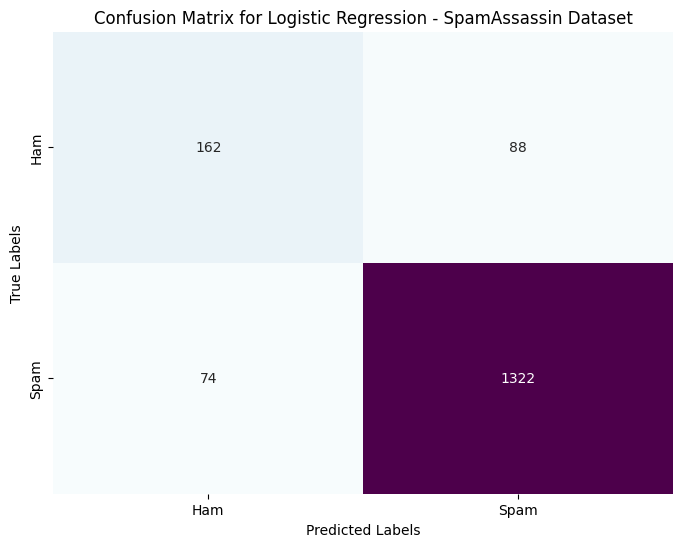

In [166]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression - SpamAssassin Dataset')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [167]:
model_table = [
    {'Model': 'Logistic Regression', 'Accuracy': LR_accuracy, 'Precision': LR_precision},
    {'Model': 'Naive Bayes', 'Accuracy': NB_accuracy, 'Precision': NB_precision},
    {'Model': 'SVM', 'Accuracy': SVM_accuracy, 'Precision': SVM_precision},
]

# Convert the data to a DataFrame
df = pd.DataFrame(model_table)


# Sort the DataFrame by both Accuracy and Precision scores
sorted_df = df.sort_values(by=['Accuracy', 'Precision'], ascending=[False, False])
sorted_df.reset_index(drop=True, inplace=True)

sorted_df.index = range(1, len(df) + 1)
sorted_df

,Model,Accuracy,Precision
1,SVM,0.930134,0.942640
2,Naive Bayes,0.907047,0.933101
3,Logistic Regression,0.901580,0.937589


## Test on Model trained with Three Different Datasets on Kaggle SpamAssassin Dataset

In [168]:
Trained_ThreeModel_SVM = joblib.load('HOS_SVM_ThreeDataset.pkl')
Trained_ThreeModel_LR = joblib.load('HOS_LR_ThreeDataset.pkl')
Trained_ThreeModel_RF = joblib.load('HOS_RF_ThreeDataset.pkl')
test3_df = pd.read_csv(r'C:\Users\vishw\Downloads\completeSpamAssassin.csv\completeSpamAssassin.csv')
vectorizer2 = joblib.load('vectorizer2.pkl')
test3_df

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1
...,...,...,...
6041,6041,empty,0
6042,6042,___ ___ ...,0
6043,6043,IN THIS ISSUE:01. Readers write\n02. Extension...,0
6044,6044,empty,0


In [169]:
test3_df.dropna(inplace=True)

In [170]:
values = test3_df['Label'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100 #ham
percentage_1 = (values[1]/ total) *100 #spam

print('percentage of ham :' ,percentage_0)
print('percentage of spam :' ,percentage_1)

percentage of ham : 68.65177832919768
percentage of spam : 31.348221670802317


In [171]:
X = test3_df['Body'].astype(str)
X_tfidf = vectorizer2.transform(X)

In [172]:
y_pred = Trained_ThreeModel_SVM.predict(X_tfidf)
y_test = test3_df['Label'].values

SVM_accuracy = accuracy_score(y_test, y_pred)
SVM_precision = precision_score(y_test, y_pred)
print("Accuracy:", SVM_accuracy)
print("Precision:", SVM_precision)

Accuracy: 0.8456575682382134
Precision: 0.7323671497584541


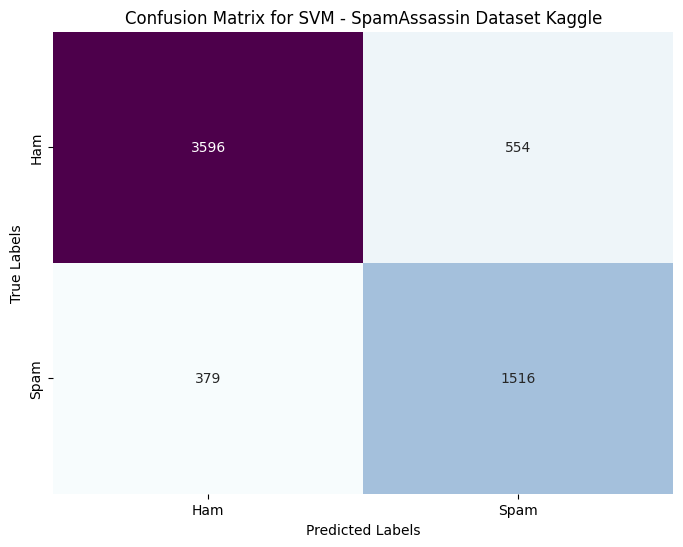

In [173]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM - SpamAssassin Dataset Kaggle')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [174]:
y_pred = Trained_ThreeModel_LR.predict(X_tfidf)
y_test = test3_df['Label'].values

LR_accuracy = accuracy_score(y_test, y_pred)
LR_precision = precision_score(y_test, y_pred)
print("Accuracy:", LR_accuracy)
print("Precision:", LR_precision)

Accuracy: 0.8461538461538461
Precision: 0.7371007371007371


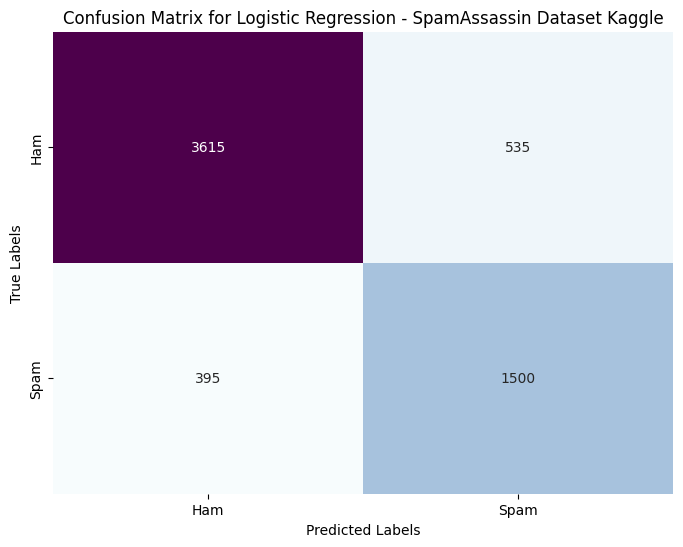

In [175]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression - SpamAssassin Dataset Kaggle')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [176]:
y_pred = Trained_ThreeModel_RF.predict(X_tfidf)
y_test = test3_df['Label'].values

RF_accuracy = accuracy_score(y_test, y_pred)
RF_precision = precision_score(y_test, y_pred)
print("Accuracy:", RF_accuracy)
print("Precision:", RF_precision)

Accuracy: 0.747394540942928
Precision: 0.5542452830188679


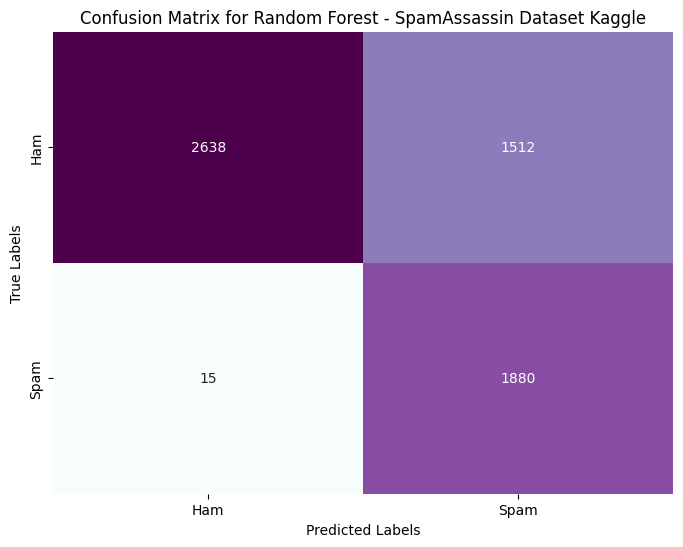

In [177]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest - SpamAssassin Dataset Kaggle')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [178]:
model_table = [
    {'Model': 'Logistic Regression', 'Accuracy': LR_accuracy, 'Precision': LR_precision},
    {'Model': 'Random Forest', 'Accuracy': RF_accuracy, 'Precision': RF_precision},
    {'Model': 'SVM', 'Accuracy': SVM_accuracy, 'Precision': SVM_precision},
]

# Convert the data to a DataFrame
df = pd.DataFrame(model_table)


# Sort the DataFrame by both Accuracy and Precision scores
sorted_df = df.sort_values(by=['Accuracy', 'Precision'], ascending=[False, False])
sorted_df.reset_index(drop=True, inplace=True)

sorted_df.index = range(1, len(df) + 1)
sorted_df

,Model,Accuracy,Precision
1,Logistic Regression,0.846154,0.737101
2,SVM,0.845658,0.732367
3,Random Forest,0.747395,0.554245


## Comparing with Word2Vec

In [236]:
w2v_RF = joblib.load('W2V_RF.joblib')
w2v_SVM = joblib.load('W2V_SVM.joblib')
w2v_LR = joblib.load('W2V_LR.joblib')
word2vec = Word2Vec.load('word2vec.bin')

In [237]:
# new_df.drop(columns = ['Unnamed: 0', 'label'], inplace = True)
new_df

,text,label_num,Subject
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol ; meter # : 988291\r\nthis is ...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"hpl nom for january 9 , 2001\r\n( see attache..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"neon retreat\r\nho ho ho , we ' re around to ..."
3,"Subject: photoshop , windows , office . cheap ...",1,"photoshop , windows , office . cheap . main t..."
4,Subject: re : indian springs\r\nthis deal is t...,0,re : indian springs\r\nthis deal is to book t...
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,put the 10 on the ft\r\nthe transport volumes...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,calpine daily gas nomination\r\n>\r\n>\r\njul...
5169,Subject: industrial worksheets for august 2000...,0,industrial worksheets for august 2000 activit...


In [238]:
import numpy as np
# Tokenize the text data
tokenized_data = [sentence.split() for sentence in new_df['Subject']]

# Obtain word embeddings for each sentence in the data
word_embeddings = []
for sentence in tokenized_data:
    sentence_embeddings = []
    for word in sentence:
        if word in word2vec.wv:
            sentence_embeddings.append(word2vec.wv[word])
    if sentence_embeddings:  # Check if the sentence contains any embeddings
        sentence_embedding = np.mean(sentence_embeddings, axis=0)
        word_embeddings.append(sentence_embedding)
    else:
        # Handle the case when all words in the sentence are out-of-vocabulary
        word_embeddings.append(np.zeros(word2vec.vector_size))

# Convert the list of embeddings into a numpy array
word_embeddings = np.array(word_embeddings)


In [239]:
y_test = new_df['label_num'].values
y_pred = w2v_RF.predict(word_embeddings)

RF_accuracy = accuracy_score(y_test, y_pred)
RF_precision = precision_score(y_test, y_pred)
print("Accuracy:", RF_accuracy)
print("Precision:", RF_precision)

Accuracy: 0.5722297427963643
Precision: 0.36878910563121087


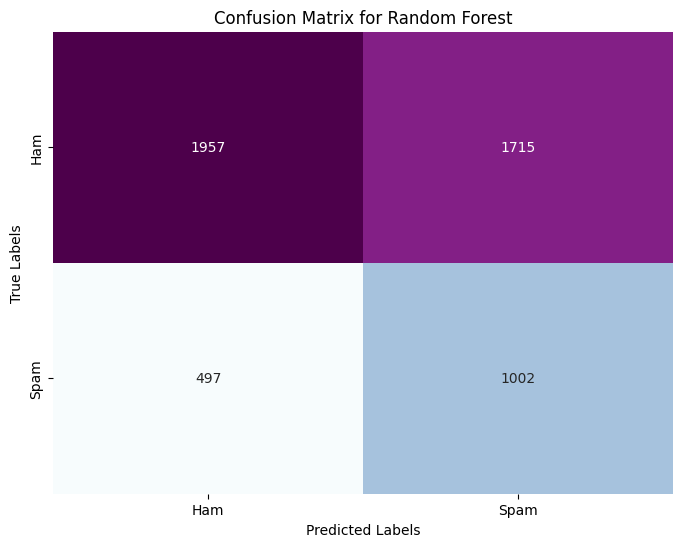

In [240]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [241]:
y_test = new_df['label_num'].values
y_pred = w2v_LR.predict(word_embeddings)

LR_accuracy = accuracy_score(y_test, y_pred)
LR_precision = precision_score(y_test, y_pred)
print("Accuracy:", LR_accuracy)
print("Precision:", LR_precision)

Accuracy: 0.572809901373042
Precision: 0.38780025284450065


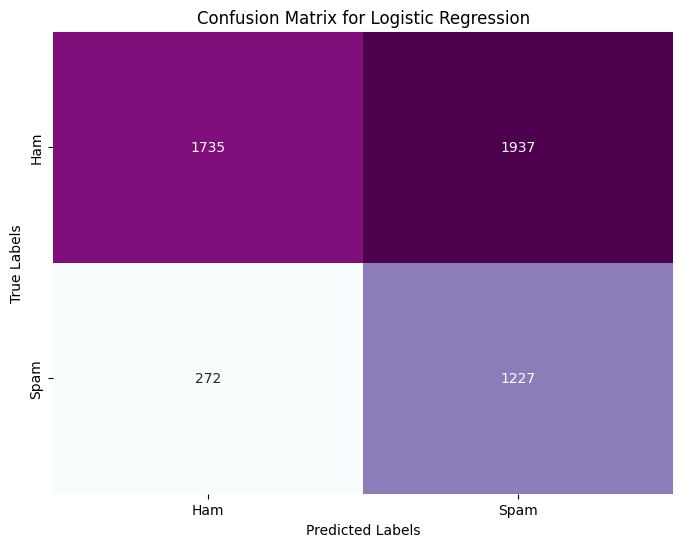

In [242]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [243]:
y_test = new_df['label_num'].values
y_pred = w2v_SVM.predict(word_embeddings)

SVM_accuracy = accuracy_score(y_test, y_pred)
SVM_precision = precision_score(y_test, y_pred)
print("Accuracy:", SVM_accuracy)
print("Precision:", SVM_precision)

Accuracy: 0.5621736608006188
Precision: 0.3761735189381677


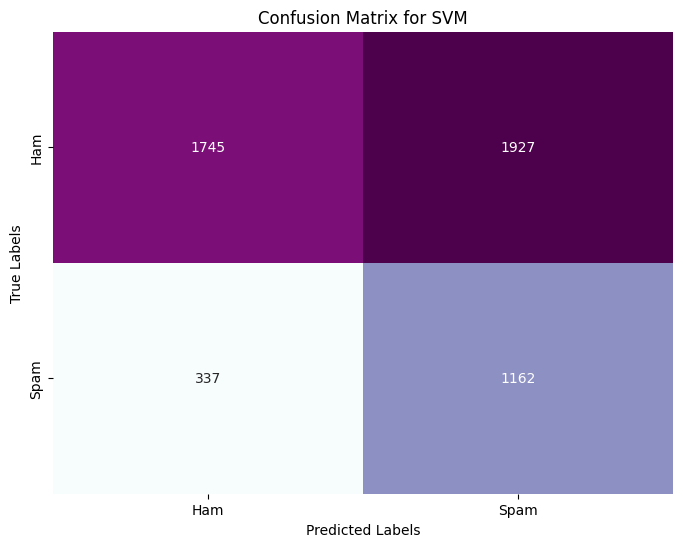

In [244]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [245]:
model_table = [
    {'Model': 'Logistic Regression', 'Accuracy': LR_accuracy, 'Precision': LR_precision},
    {'Model': 'Random Forest', 'Accuracy': RF_accuracy, 'Precision': RF_precision},
    {'Model': 'SVM', 'Accuracy': SVM_accuracy, 'Precision': SVM_precision},
]

# Convert the data to a DataFrame
df = pd.DataFrame(model_table)


# Sort the DataFrame by both Accuracy and Precision scores
sorted_df = df.sort_values(by=['Accuracy', 'Precision'], ascending=[False, False])
sorted_df.reset_index(drop=True, inplace=True)

sorted_df.index = range(1, len(df) + 1)
sorted_df

,Model,Accuracy,Precision
1,Logistic Regression,0.572810,0.387800
2,Random Forest,0.572230,0.368789
3,SVM,0.562174,0.376174


# Comparing with Bag of Words

In [255]:
BOW_RF = joblib.load('BOW_RF.pkl')
BOW_NB = joblib.load('BOW_NB.pkl')
BOW_LR = joblib.load('BOW_LR.pkl')
BOW = joblib.load('BOW_vectorizer.pkl')

In [256]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
X = df['Subject'].astype(str)
X = BOW.transform(X)

In [257]:
y_pred = BOW_LR.predict(X)
y_test = df['label_num'].values

LR_accuracy = accuracy_score(y_test, y_pred)
LR_precision = precision_score(y_test, y_pred)
print("Accuracy:", LR_accuracy)
print("Precision:", LR_precision)

Accuracy: 0.617664730622872
Precision: 0.4186977082575482


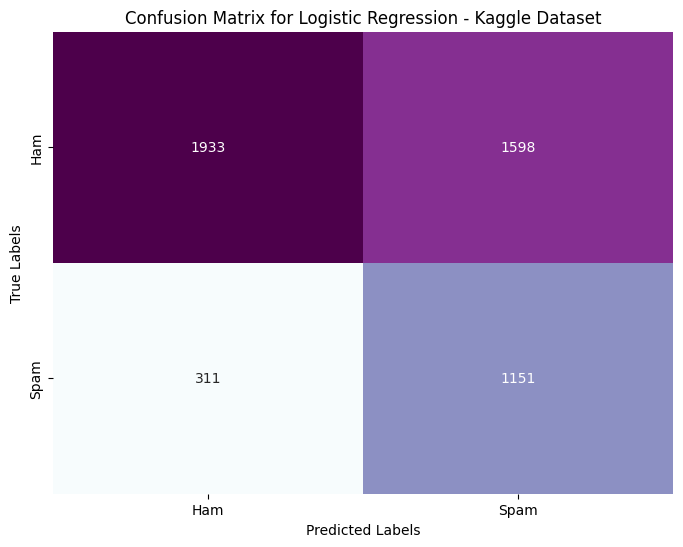

In [258]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression - Kaggle Dataset')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [259]:
y_pred = BOW_NB.predict(X)
y_test = df['label_num'].values

NB_accuracy = accuracy_score(y_test, y_pred)
NB_precision = precision_score(y_test, y_pred)
print("Accuracy:", NB_accuracy)
print("Precision:", NB_precision)

Accuracy: 0.6949729621470058
Precision: 0.48639000446229363


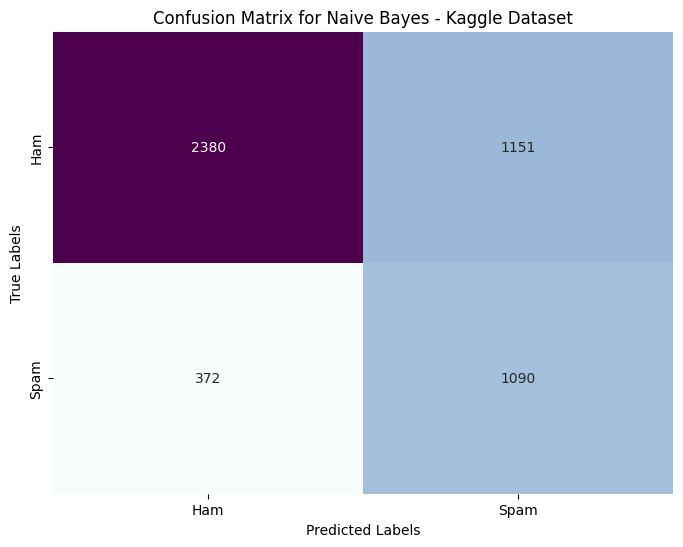

In [260]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes - Kaggle Dataset')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [261]:
y_pred = BOW_RF.predict(X)
y_test = df['label_num'].values

RF_accuracy = accuracy_score(y_test, y_pred)
RF_precision = precision_score(y_test, y_pred)
print("Accuracy:", RF_accuracy)
print("Precision:", RF_precision)

Accuracy: 0.696775485679952
Precision: 0.48643006263048016


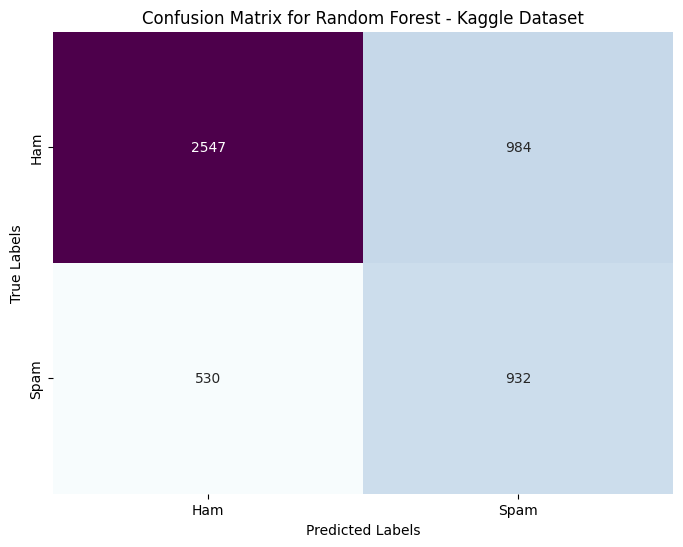

In [262]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest - Kaggle Dataset')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [282]:
# from sklearn.metrics import classification_report

# # Assuming you have already trained your classifier and obtained predicted probabilities
# predicted_probabilities = BOW_RF.predict_proba(X)

# # Define a new threshold
# new_threshold = 0.7  # Adjust this threshold as needed

# # Adjust predictions based on the new threshold
# adjusted_predictions = (predicted_probabilities[:, 1] >= new_threshold).astype(int)

# # Evaluate performance
# print(classification_report(y_test, adjusted_predictions))


              precision    recall  f1-score   support

           0       0.75      0.92      0.83      3531
           1       0.58      0.26      0.36      1462

    accuracy                           0.73      4993
   macro avg       0.66      0.59      0.59      4993
weighted avg       0.70      0.73      0.69      4993



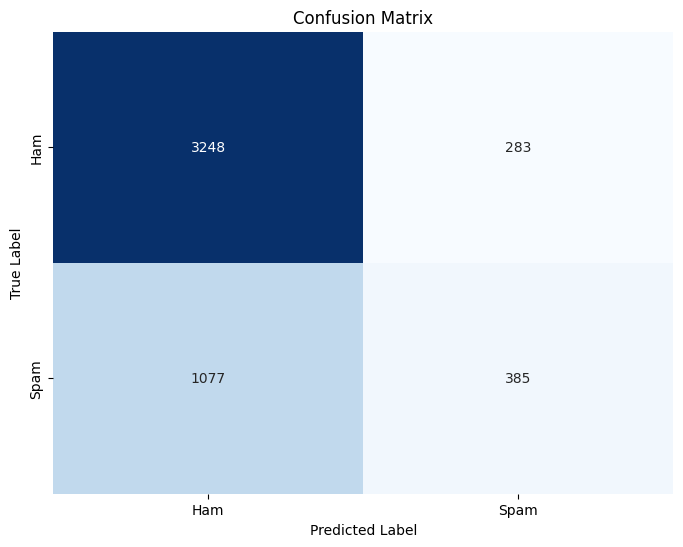

In [283]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, adjusted_predictions)

# # Plot the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')

# plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
# plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])

# plt.show()


In [263]:
model_table = [
    {'Model': 'Logistic Regression', 'Accuracy': LR_accuracy, 'Precision': LR_precision},
    {'Model': 'Random Forest', 'Accuracy': RF_accuracy, 'Precision': RF_precision},
    {'Model': 'Naive Bayes', 'Accuracy': NB_accuracy, 'Precision': NB_precision},
]

# Convert the data to a DataFrame
df = pd.DataFrame(model_table)


# Sort the DataFrame by both Accuracy and Precision scores
sorted_df = df.sort_values(by=['Accuracy', 'Precision'], ascending=[False, False])
sorted_df.reset_index(drop=True, inplace=True)

sorted_df.index = range(1, len(df) + 1)
sorted_df

,Model,Accuracy,Precision
1,Random Forest,0.696775,0.486430
2,Naive Bayes,0.694973,0.486390
3,Logistic Regression,0.617665,0.418698
